In [1]:
print('Project1')

Project1


In [2]:
import pandas as pd

feats = pd.read_csv(
    "../Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv",
    index_col = 0
)
target = pd.read_csv(
    "../Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv",
    index_col = 0
)

In [3]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    feats, target, test_size=test_size, random_state=random_state
)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 32)
(905, 32)
(3616, 1)
(905, 1)


In [5]:
from keras.models import Sequential
model = Sequential()

In [6]:
from keras.layers import Dense, Activation
from keras.models import Sequential

input_shape = X_train.shape[1]

model.add(Dense(256, activation='tanh' ,input_dim = input_shape))
model.add(Dense(128, activation='tanh'))
model.add(Dense(96, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1

In [9]:
history = model.fit(
    x=X_train, y=y_train['y'],
    epochs=10, batch_size=32, validation_split=0.2
)

Epoch 1/10
91/91 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8769 - val_loss: 0.3055 - val_accuracy: 0.8936
Epoch 2/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8800 - val_loss: 0.3082 - val_accuracy: 0.8936
Epoch 3/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8804 - val_loss: 0.3049 - val_accuracy: 0.8936
Epoch 4/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8817 - val_loss: 0.3009 - val_accuracy: 0.8936
Epoch 5/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8811 - val_loss: 0.3065 - val_accuracy: 0.8923
Epoch 6/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8790 - val_loss: 0.3130 - val_accuracy: 0.8909
Epoch 7/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8800 - val_loss: 0.2978 - val_accuracy: 0.8923
Epoch 8/10
91/91 [==

In [10]:
print(history.history)

{'loss': [0.3578730821609497, 0.33496788144111633, 0.3284696936607361, 0.32157430052757263, 0.3223356008529663, 0.32297688722610474, 0.3206489682197571, 0.3190639913082123, 0.3202095627784729, 0.3208448588848114], 'accuracy': [0.8769018054008484, 0.8800138235092163, 0.8803595900535583, 0.8817427158355713, 0.8810511827468872, 0.8789764642715454, 0.8800138235092163, 0.8796680569648743, 0.8793222904205322, 0.8789764642715454], 'val_loss': [0.3054555058479309, 0.30818745493888855, 0.3048686981201172, 0.3008561432361603, 0.3064599931240082, 0.3130033016204834, 0.2978208363056183, 0.3183857798576355, 0.3009495735168457, 0.32048043608665466], 'val_accuracy': [0.8936464190483093, 0.8936464190483093, 0.8936464190483093, 0.8936464190483093, 0.8922652006149292, 0.8908839821815491, 0.8922652006149292, 0.8743094205856323, 0.8936464190483093, 0.8936464190483093]}


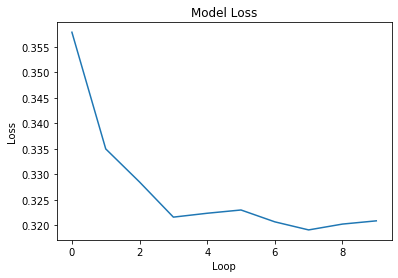

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Loop')
plt.draw()
fig = plt.gcf()
fig.savefig('myfile.png', dpi=fig.dpi)
plt.show()

In [12]:
!ls

myfile.gif  myfile.png	Project1.ipynb	Untitled.ipynb


In [13]:
!mv myfile.png myfile.gif

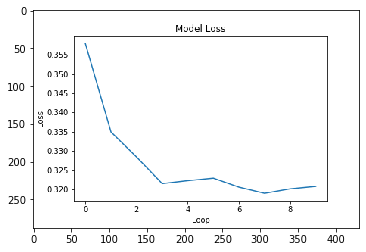

In [14]:
a = plt.imread('./myfile.gif')
plt.imshow(a) # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray')

In [15]:
from flask import Flask, jsonify

import requests
import json

In [16]:
from flask_restful import Resource, Api, reqparse

In [ ]:
from flask import Flask, render_template , send_file, request
from PIL import Image
import io
import os

    
app = Flask(__name__, static_url_path='/static')
api = Api(app)

@app.route('/')
def index() :
    # convert numpy array to PIL Image
    img = Image.fromarray(a.astype('uint8'))
    
    # create file-object in memory
    file_object = io.BytesIO()

    # write PNG in file-object
    img.save(file_object, 'PNG')

    # move to beginning of file so `send_file()` it will read from start    
    file_object.seek(0)
    
    return send_file(file_object, mimetype='image/PNG')

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
# app = Flask(__name__)
# api = Api(app)

# # localhost:8080/dataServer로 요청을 하면
# # 아래 함수가 동작을 한다는 의미!
# @app.route('/dataServer')
# def PythonServerResponse():
#     print("It's operate")
#     summary = {
#         'result': history.history
#     }
    
#     return summary
# app.run()